In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

%run backwards_time_voter_model.ipynb

In [13]:
# Define parameters as in paper
alpha = 3e-4
L = 300

In [14]:
species = voter_model_fast(L, alpha, kernel='fat tail', W=20, eta=-1)

# pickle.dump(species, open(f"{}x{},alpha={},kernel={kernel},W={W},eta={eta}.p", "wb" ))

  0%|                                      | 113/90000 [00:00<05:05, 294.48it/s]


In [15]:
species_load = species
species_ids = np.random.uniform(size=len(species_load))
print(len(species_load))

grid = np.zeros((L, L))
for i, specie in enumerate(species_load):
    for coord in specie:
        grid[coord] = species_ids[i]

25


In [16]:
# grids = []

# for i in range(1, 5):
#     species_load = pickle.load(open(f"{L}x{L},alpha={alpha},kernel=nearest.p_{i}", "rb" ))
#     species_ids = np.random.uniform(size=len(species_load))
#     print(len(species_load))

#     grid = np.zeros((L, L))
#     for i, specie in enumerate(species_load):
#         for coord in specie:
#             grid[coord] = species_ids[i]
#     grids.append(grid)

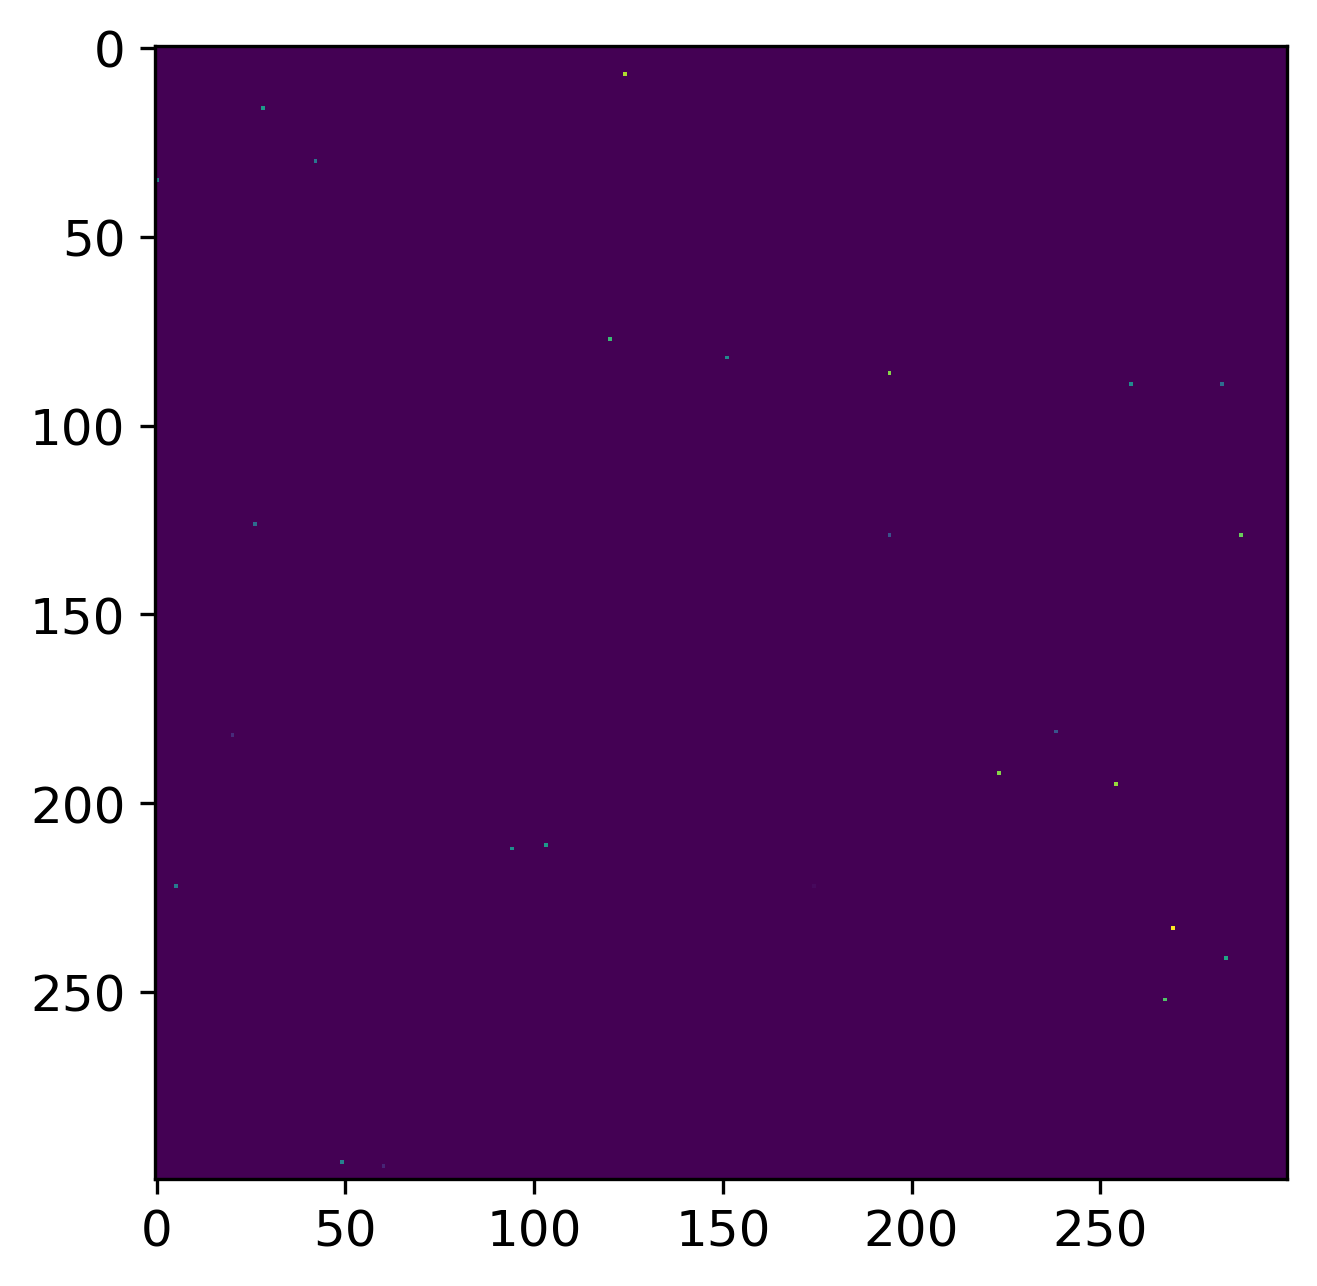

In [17]:
plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.show()

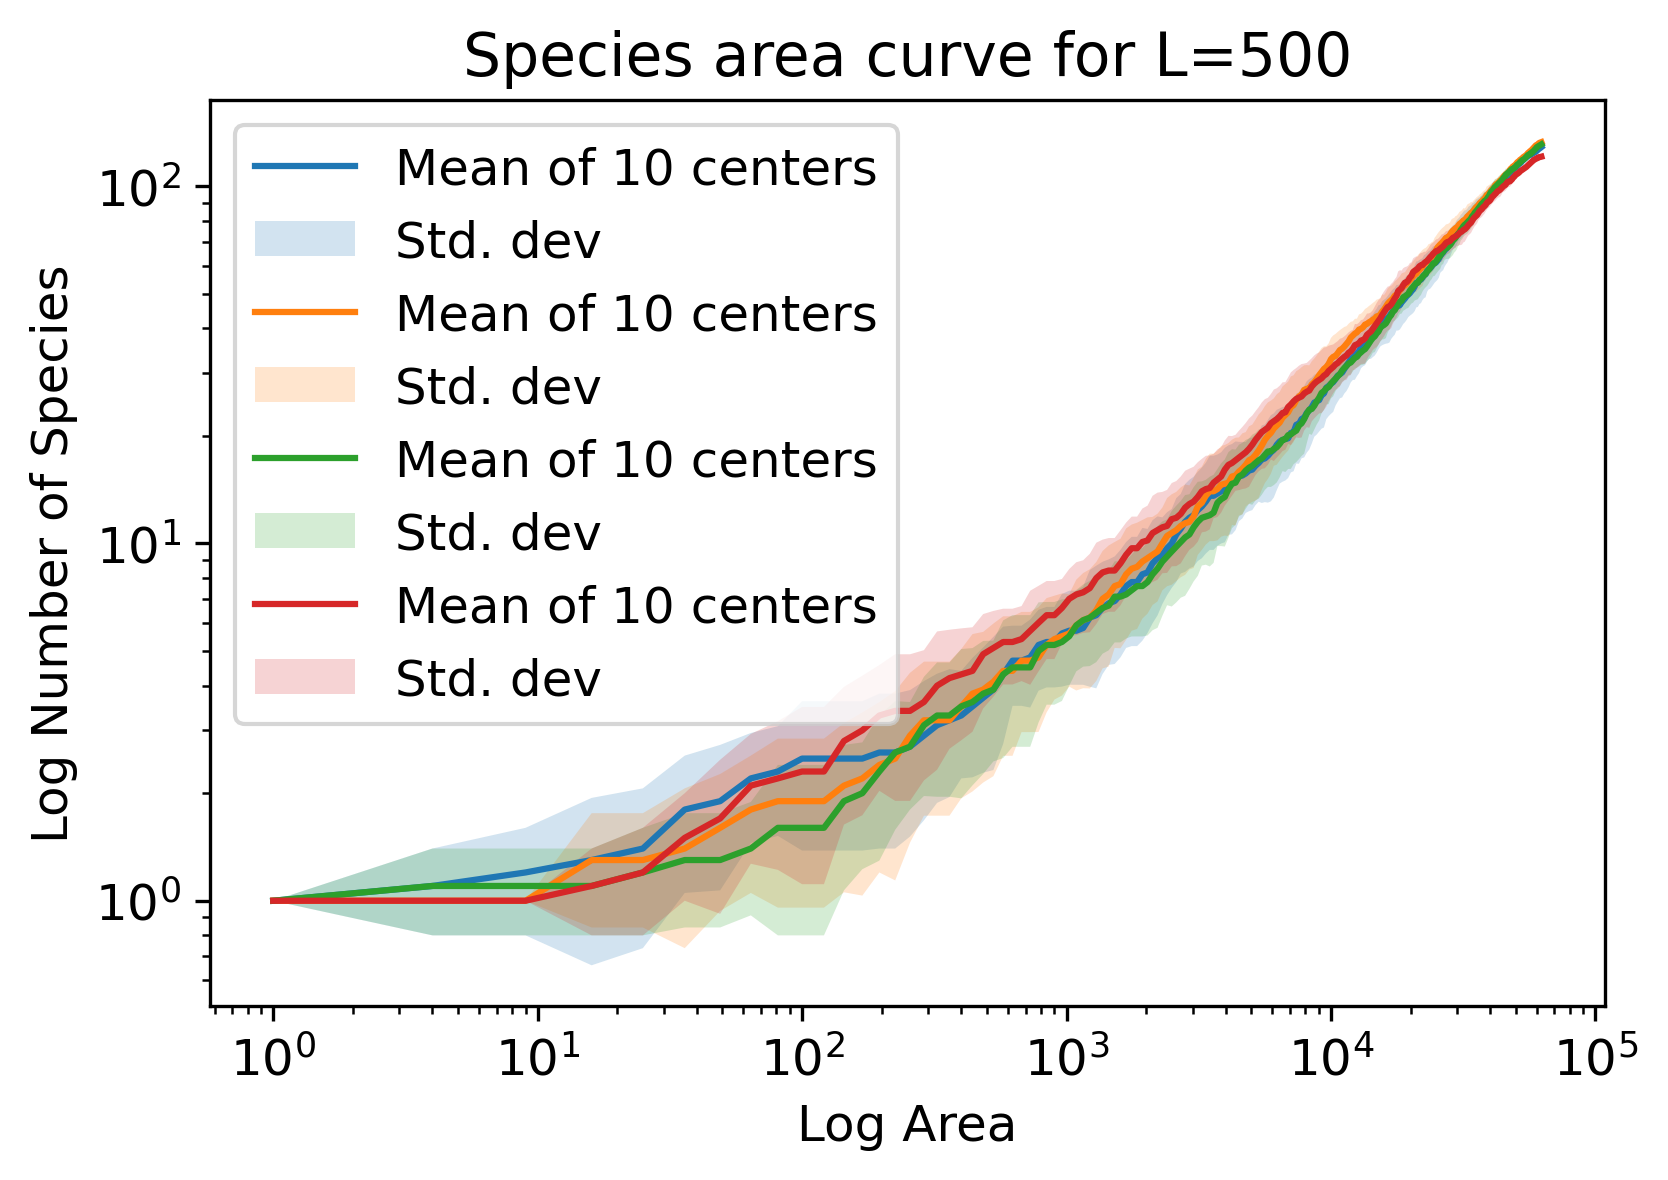

In [10]:
grids = [grid]
for grid in grids:
    n_centers = 10
    areas, num_species = sa_curve(grid, n_centers)
    spec_std_dev = np.std(num_species, axis=0)
    spec_mean = np.mean(num_species, axis=0)

    poly_coeffs = np.polyfit(np.log(areas)[:15], np.log(spec_mean)[:15], 1)

    plt.loglog(areas, list(spec_mean), label='Mean of 10 centers')
#     plt.loglog([areas[0], areas[15]],
#                np.exp(poly_coeffs[1])*np.array([areas[0], areas[15]])**poly_coeffs[0],
#                linestyle='dashed')
    plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()